In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib
import webbrowser
import os
import numpy as np

In [2]:
url = "https://quiz.ucsd.edu/lcl/www-data/CouchPotato/"

In [3]:
content = urllib.request.urlopen(url)

In [4]:
soup = BeautifulSoup(content)

In [5]:
#https://quiz.ucsd.edu/lcl/www-data/CouchPotato/0fra.csv

In [6]:
links = soup.find_all("li")

In [7]:
#for link in links:
#    if 'csv' in link.text:
#        webbrowser.open(url+link.text.strip())        

In [3]:
master_dataset = pd.DataFrame()
for r in os.listdir('Data'):
    response = pd.read_csv('Data/'+r)
    response['id'] = r.replace('.csv', '')
    master_dataset = master_dataset.append(response)
master_dataset = master_dataset.reset_index(drop=True)
master_dataset.columns

/Users/jordanlevy/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Index(['data_type', 'id', 'int_type', 'int_type_1', 'int_type_2',
       'internal_node_id', 'noun_type', 'response', 'rt', 'stimulus',
       'sub_type', 'sub_type_1', 'sub_type_2', 'time_elapsed', 'trial_index',
       'trial_type', 'url', 'viet_int_type', 'viet_int_type_1',
       'viet_int_type_2', 'viet_noun_type', 'viet_sub_type', 'viet_sub_type_1',
       'viet_sub_type_2', 'view_history'],
      dtype='object')

In [4]:
responses = master_dataset[master_dataset['response'].isnull() != True].reset_index(drop=True)
responses['response'] /= 6

In [5]:
responses['response'] /= 6

In [6]:
data_type_groups = responses.groupby('data_type')

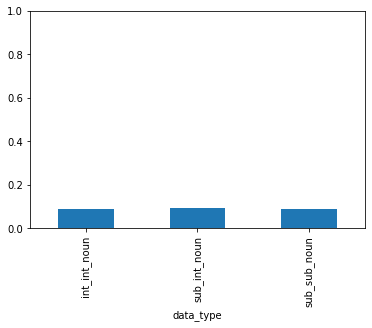

In [7]:
data_type_groups['response'].apply(np.mean).plot.bar(ylim=[0,1])

In [8]:
master_dataset['int_type_1'].value_counts()

yellow     82
dirty      80
red        78
clean      77
round      74
square     73
wooden     48
plastic    48
Name: int_type_1, dtype: int64

In [9]:
filters = pd.read_csv('LIGN_Honors_filters.csv')
filters.columns = ['Word Type', 'Intersective_V', 'Intersective_E', 'Intersective_Class',  \
                                'Subsective_V', 'Subsective_E', 'Subsective_Class']

In [10]:
filters_adj = filters.loc[filters.index[:8].values].drop('Word Type', axis=1)
filters_noun = filters.loc[filters.index[8:].values].drop('Word Type', axis=1)

In [11]:
filters_adj

,Intersective_V,Intersective_E,Intersective_Class,Subsective_V,Subsective_E,Subsective_Class
0,màu đỏ,red,color,ngọt,sweet,taste
1,màu vàng,yellow,color,đắng,bitter,taste
2,hình tròn,round,shape,đẹp,beautiful,value
3,hình vuông,square,shape,xấu,ugly,value
4,dơ,dirty,appearance,lớn,big,size
5,sạch,clean,appearance,nhỏ,small,size
6,nhựa,plastic,material,cao,tall,height
7,gỗ,wooden,material,thấp,short,height


In [12]:
intersective_dict = dict(zip(filters_adj['Intersective_E'].values, filters_adj['Intersective_Class'].values))
intersective_dict

{'red': 'color',
 'yellow': 'color',
 'round': 'shape',
 'square': 'shape',
 'dirty': 'appearance',
 'clean': 'appearance',
 'plastic': 'material',
 'wooden': 'material'}

In [13]:
subsective_dict = dict(zip(filters_adj['Subsective_E'].values, filters_adj['Subsective_Class'].values))
subsective_dict

{'sweet': 'taste',
 'bitter': 'taste',
 'beautiful': 'value',
 'ugly': 'value',
 'big': 'size',
 'small': 'size',
 'tall': 'height',
 'short': 'height'}

In [14]:
len(responses)

1680

In [15]:
sub_1 = responses['sub_type'].replace(subsective_dict).dropna().append(responses['sub_type_1'].replace(subsective_dict).dropna())

In [16]:
sub_1

1       value
3       value
5       taste
11      value
16       size
        ...  
1665    value
1671    value
1672    taste
1674    value
1679    value
Length: 1079, dtype: object

In [17]:
responses[(responses['int_type_1'].isnull()) & (responses['int_type_2'].isnull() != True)]

,data_type,id,int_type,int_type_1,int_type_2,internal_node_id,noun_type,response,rt,stimulus,...,trial_type,url,viet_int_type,viet_int_type_1,viet_int_type_2,viet_noun_type,viet_sub_type,viet_sub_type_1,viet_sub_type_2,view_history


In [18]:
responses = master_dataset[master_dataset['response'].isnull() != True].reset_index(drop=True)
responses['response'] /= 6

In [19]:
responses = responses.drop(responses[(responses['sub_type_1'].isnull()) & (responses['sub_type_2'].isnull()!= True)].index)
responses = responses.drop(responses[(responses['sub_type_1'].isnull()!=True) & (responses['sub_type_2'].isnull())].index)
responses = responses.drop(responses[(responses['sub_type'].isnull()) & (responses['int_type'].isnull()!=True)].index)
responses = responses.reset_index(drop=True)

In [20]:
int_1 = responses['int_type_1'].replace(intersective_dict).dropna()
sub_1 = responses['sub_type'].replace(subsective_dict).dropna().append(responses['sub_type_1'].replace(subsective_dict).dropna())

In [21]:
word_1 = sub_1.append(int_1)
word_1 = word_1.sort_index()

In [22]:
sub_2 = responses['sub_type_2'].replace(subsective_dict).dropna()
int_2 = responses['int_type'].replace(intersective_dict).dropna().append(responses['int_type_2'].replace(intersective_dict).dropna())

In [23]:
word_2 = sub_2.append(int_2)
word_2 = word_2.sort_index()

In [24]:
responses['word_1'] = word_1
responses['word_2'] = word_2

In [25]:
responses[['sub_type', 'int_type', 'int_type_1', 'int_type_2', 'sub_type_1', 'sub_type_2', 'word_1', 'word_2', 'response']]

,sub_type,int_type,int_type_1,int_type_2,sub_type_1,sub_type_2,word_1,word_2,response
0,NaN,NaN,NaN,NaN,beautiful,sweet,value,taste,0.0
1,ugly,clean,NaN,NaN,NaN,NaN,value,appearance,1.0
2,NaN,NaN,NaN,NaN,tall,beautiful,height,value,0.0
3,ugly,dirty,NaN,NaN,NaN,NaN,value,appearance,1.0
4,NaN,NaN,clean,square,NaN,NaN,appearance,shape,1.0
...,...,...,...,...,...,...,...,...,...
1608,small,wooden,NaN,NaN,NaN,NaN,size,material,0.0
1609,big,red,NaN,NaN,NaN,NaN,size,color,1.0
1610,NaN,NaN,square,clean,NaN,NaN,shape,appearance,1.0
1611,ugly,square,NaN,NaN,NaN,NaN,value,shape,1.0


In [26]:
responses['response_2'] = responses['response']  # probability that word_2 should go first
responses['response_1'] = 1 - responses['response']  # probability that word_1 should go first

In [27]:
def get_class_mean(df):
    class_sum = df.groupby('word_2')['response_2'].apply(sum) + df.groupby('word_1')['response_1'].apply(sum)
    class_count = df.groupby('word_2')['response_2'].apply(len) + df.groupby('word_1')['response_1'].apply(len)
    class_mean = (class_sum / class_count).sort_values(ascending=False)
    return class_mean

In [28]:
get_class_mean(responses)

word_2
material      0.768595
size          0.695424
height        0.557428
color         0.539575
shape         0.457599
appearance    0.414162
taste         0.311198
value         0.306759
dtype: float64

In [29]:
filters_noun

,Intersective_V,Intersective_E,Intersective_Class,Subsective_V,Subsective_E,Subsective_Class
8,cái ly,cup,furniture,cái ghế,chair,furniture
9,cái bàn,table,furniture,cái xe,car,furniture
10,cái quạt,fan,furniture,trái chuối,banana,food
11,trái xoài,mango,food,xôi,sticky rice,food
12,cục kẹo,candy,food,trái ớt,pepper,food


In [30]:
noun_dict = dict(zip(filters_noun['Intersective_E'], filters_noun['Intersective_Class']))
noun_dict.update(dict(zip(filters_noun['Subsective_E'], filters_noun['Subsective_Class'])))

In [31]:
noun_dict

{'cup': 'furniture',
 'table': 'furniture',
 'fan': 'furniture',
 'mango': 'food',
 'candy': 'food',
 'chair': 'furniture',
 'car': 'furniture',
 'banana': 'food',
 'sticky rice': 'food',
 'pepper': 'food'}

In [32]:
responses['noun_class'] = responses['noun_type'].replace(noun_dict)

In [35]:
total_classes = get_class_mean(responses)

In [36]:
noun_classes = responses.groupby('noun_class').apply(get_class_mean)

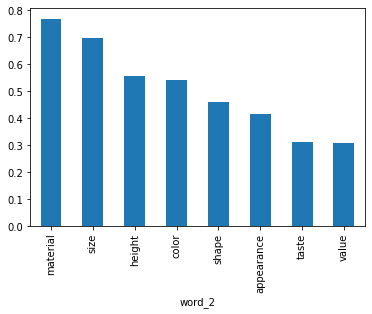

In [40]:
total_classes.plot.bar()

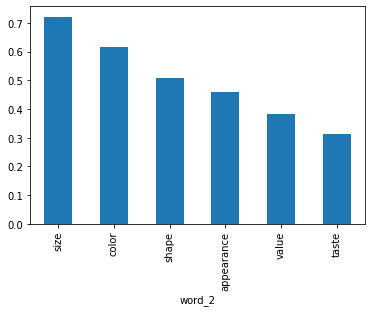

In [46]:
noun_classes['food'].plot.bar()

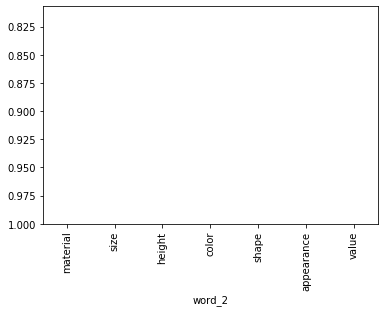

In [52]:
noun_classes['furniture'].plot.bar(ylim=(0.1))